# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

# Ali Seymen Alkara
# asalkara@gmail.com
### Deadline: 08/12/2020 9:00 GMT + 3

# Data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics as met


In [5]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Read csv
data = pd.read_csv("C:\\Users\\leven\\Documents\\Seymen\\Python scripts\\churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyze missing values
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.isnull().sum() # there is no missing data

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

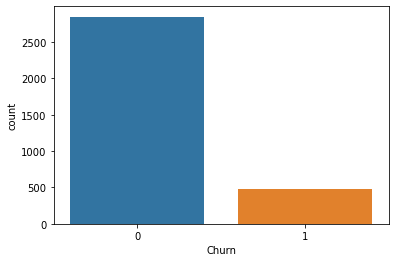

In [8]:
sns.countplot(x=data.Churn)

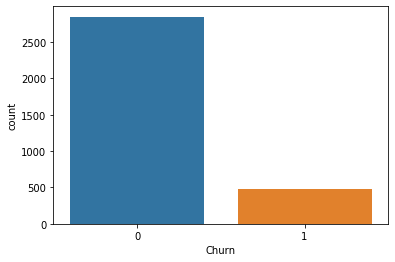

In [7]:
# Our label Distribution (countplot)


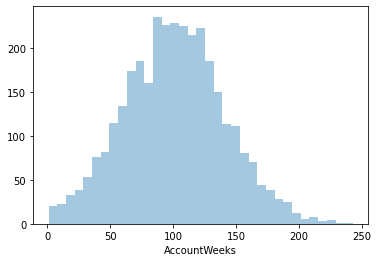

In [9]:
sns.distplot(a=data['AccountWeeks'], kde=False)

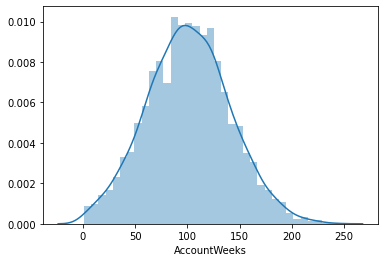

In [11]:
sns.distplot(a=data['AccountWeeks'], kde=True)

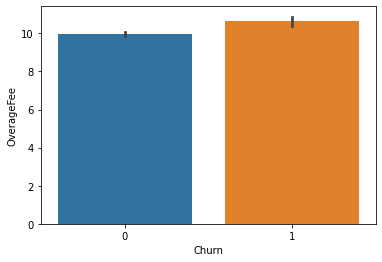

In [13]:
sns.barplot(x=data.Churn, y=data.OverageFee)

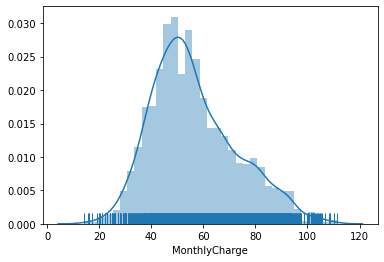

In [12]:
sns.distplot(data['MonthlyCharge'], rug=True)

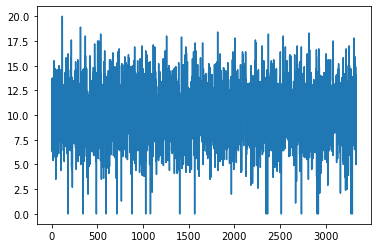

In [17]:
sns.lineplot(data=data.RoamMins,hue=data.Churn)

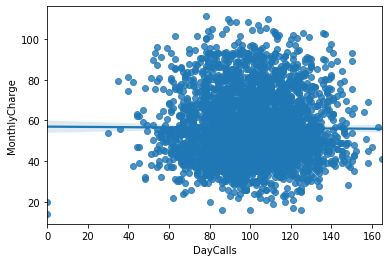

In [18]:
sns.regplot(x=data['DayCalls'], y=data['MonthlyCharge'])  # add a regression line

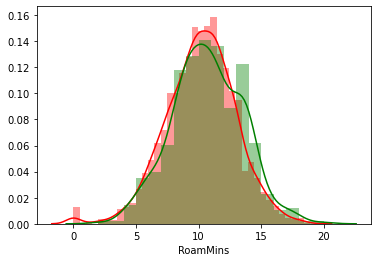

In [35]:
sns.distplot(data[data.Churn == 0].RoamMins,color="r")
sns.distplot(data[data.Churn == 1].RoamMins,color="g")

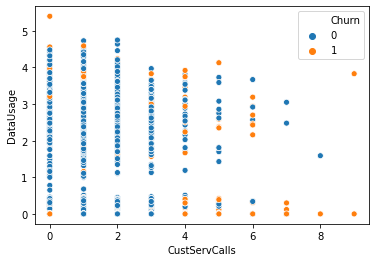

In [37]:
sns.scatterplot(x="CustServCalls", y="DataUsage", hue="Churn", data=data)

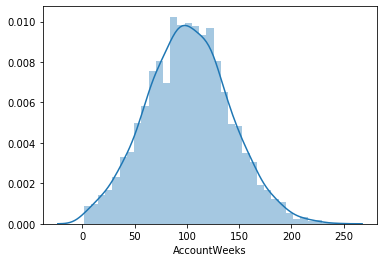

In [3]:
# Example EDA


# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [19]:
data.duplicated().sum() # there are no duplicated rows

0

In [21]:
y = data.Churn
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [22]:
X = data.iloc[:,1:]
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [23]:
# we need to do feature scaling because we will use logistic regression
X_ms = MinMaxScaler().fit_transform(X)
X_rs = RobustScaler().fit_transform(X)
X_ss = StandardScaler().fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.30, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(2333, 10)
(1000, 10)


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [ ]:
Define appropriate evaluation metric for our case (classification).
Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
Analyse and compare results of 3 algorithms.
Select best performing model based on evaluation metric you chose on test dataset.

In [ ]:
1 is churn and 0 is not churn. we would like to not miss 1's
we may misclassify 0's as 1's but 1's as 0 is costly
I choose recall as the evaluation metric

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8546951284740487
Test accuracy: 0.864


In [31]:
y_pred = cv["estimator"][0].predict(X)
confusion_matrix(y, y_pred)

array([[   0, 2850],
       [   0,  483]], dtype=int64)

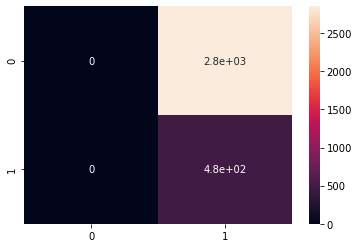

In [32]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2850
           1       0.14      1.00      0.25       483

    accuracy                           0.14      3333
   macro avg       0.07      0.50      0.13      3333
weighted avg       0.02      0.14      0.04      3333



C:\Users\leven\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
cv["estimator"]

(LogisticRegression(n_jobs=-1, random_state=42),
 LogisticRegression(n_jobs=-1, random_state=42),
 LogisticRegression(n_jobs=-1, random_state=42))

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, random_state=0)

rfc.fit(X, y)

rfc.predict_proba(X)

array([[0.95, 0.05],
       [0.95, 0.05],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [1.  , 0.  ]])

In [40]:
confusion_matrix(y, rfc.predict(X))

array([[2850,    0],
       [  10,  473]], dtype=int64)

In [42]:
print(classification_report(y, rfc.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      0.98      0.99       483

    accuracy                           1.00      3333
   macro avg       1.00      0.99      0.99      3333
weighted avg       1.00      1.00      1.00      3333



In [48]:
def evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #y_pred_proba = clf.predict_proba(X_test)
    print(clf)
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))
    #print('AUC score')
    #print(roc_auc_score(y_test, y_pred_proba[:,1]))
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))

In [44]:
from sklearn import svm # support vector machines

clf1 = svm.LinearSVC(loss="hinge", C=1, max_iter=10000)

clf2 = svm.SVC(kernel="linear", C=1)

In [50]:
from sklearn.metrics import accuracy_score

for est in [clf1,clf2]:
    evaluate(est, X_train, y_train, X_test, y_test)

LinearSVC(C=1, loss='hinge', max_iter=10000)
Accuracy
0.857
Confusion Matrix
[[857   0]
 [143   0]]
SVC(C=1, kernel='linear')
Accuracy
0.857
Confusion Matrix
[[857   0]
 [143   0]]


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model performance.

In [ ]:
I choose the first model (LogisticRegressionClassifier) because it is a perfect classifier,
with recall = 1 for both classes.

We can improve model performance by using imbalance and SMOTE and undersampling and oversampling